# Create Simple Graphs with Adjacency Matrix


## Install the necessary python libraries

In [209]:
!pip install networkx pandas numpy matplotlib

import networkx as nx
import numpy as np
import pandas as pd

## A simple python class to store a graph structure as an adjacency matrix.

In [210]:
import networkx as nx
import numpy as np
import pandas as pd

class Graph(object):

    # Initialize the matrix
    # params:
    # size: the total nodes in the graph
    # directed: the graph will be a directed graph if True. Otherwise this is the undirected
    def __init__(self, size, directed=False):
        self.adjMatrix = []
        self.directed = directed
        
        for i in range(size):
            self.adjMatrix.append([0 for i in range(size)])
        self.size = size

    # Add edges
    def add_edge(self, v1, v2, weight=1):
        self.adjMatrix[v1][v2] = weight
        if not self.directed:
            self.adjMatrix[v2][v1] = weight

    # Remove edges
    def remove_edge(self, v1, v2):
        if self.adjMatrix[v1][v2] == 0:
            print("No edge between %d and %d" % (v1, v2))
            return
        self.adjMatrix[v1][v2] = 0
        self.adjMatrix[v2][v1] = 0

    def __len__(self):
        return self.size

    # Print the matrix
    def print_matrix(self):
        for row in self.adjMatrix:
            row_line = '\t'.join(map(str, row))
            print(f'{row_line}'),


## Create an undirected graph and print its Adjacency Matrix

0	0	1	0	1
0	0	1	1	0
1	1	0	1	0
0	1	1	0	1
1	0	0	1	0


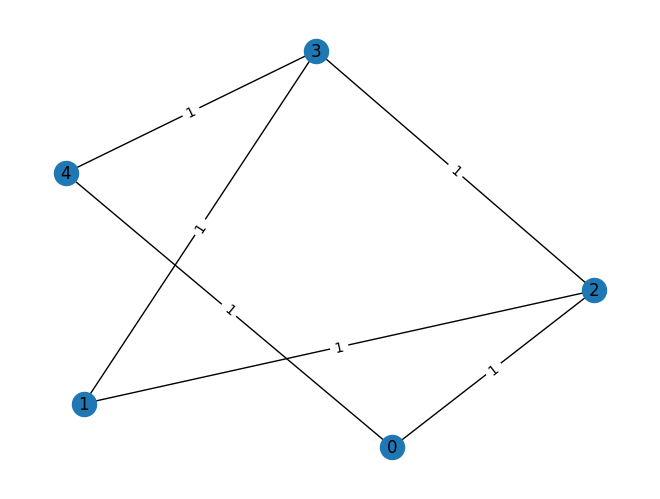

In [211]:
# Draw the graph
def show_graph(adjacency_matrix, directed=False):
    rows = []
    cols = []
    values = []
    for i in range(len(adjacency_matrix)):
        for j, value in enumerate(adjacency_matrix[i]):
            if value != 0:
                rows.append(i)
                cols.append(j)
                values.append(value)
                
    edges = zip(rows, cols, values)
    if directed:
        gr = nx.DiGraph()
    else:
        gr = nx.Graph()
    gr.add_weighted_edges_from(edges)
    
    pos = nx.spring_layout(gr, k=10)  # For better example looking
    nx.draw(gr, pos, with_labels=True)
    labels = nx.get_edge_attributes(gr,'weight')
    nx.draw_networkx_edge_labels(gr, pos, edge_labels=labels)

    plt.show()

    
def main():
    # Initialize the graph
    g = Graph(5)
    # Add edges 
    g.add_edge(0, 2)
    g.add_edge(0, 4)
    g.add_edge(1, 2)
    g.add_edge(1, 3)
    g.add_edge(2, 0)
    g.add_edge(2, 3)
    g.add_edge(3, 4)

    g.print_matrix()
    
    show_graph(g.adjMatrix)


if __name__ == '__main__':
    main()

## Create an directed graph and print its Adjacency Matrix

0	0	1	0	1
0	0	1	1	0
1	0	0	1	0
0	0	0	0	1
0	0	0	0	0


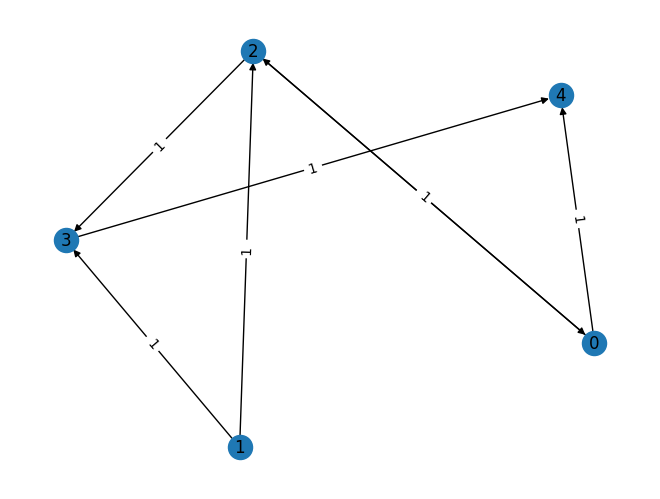

In [212]:
def main():
    g = Graph(5, directed=True)
    g.add_edge(0, 2)
    g.add_edge(0, 4)
    g.add_edge(1, 2)
    g.add_edge(1, 3)
    g.add_edge(2, 0)
    g.add_edge(2, 3)
    g.add_edge(3, 4)

    g.print_matrix()
    show_graph(g.adjMatrix, directed=True)


if __name__ == '__main__':
    main()

## Create a weighted graph and print its Adjacency Matrix

In [213]:
def main():
    g = Graph(5)
    g.add_edge(0, 2, 0.5)
    g.add_edge(0, 4)
    g.add_edge(1, 2, 2.0)
    g.add_edge(1, 3)
    g.add_edge(2, 0, 0.5)
    g.add_edge(2, 3, 3.0)
    g.add_edge(3, 4, 2.5)

    g.print_matrix()


if __name__ == '__main__':
    main()

0	0	0.5	0	1
0	0	2.0	1	0
0.5	2.0	0	3.0	0
0	1	3.0	0	2.5
1	0	0	2.5	0


## Create a function to print all out edges of a node

In [214]:
def print_out_edges(self, v):
    if v > self.size - 1:
        print(f"Not found the vertex {v}")
        return
    print(f"List of out-edges of node {v}: ");
    for index, value in enumerate(self.adjMatrix[v]):
        if value != 0:
            print(f"{v} --{value}--> {index}")
        
        
setattr(Graph, "print_out_edges", print_out_edges)

List of out-edges of node 0: 
0 --0.5--> 2
0 --1--> 4


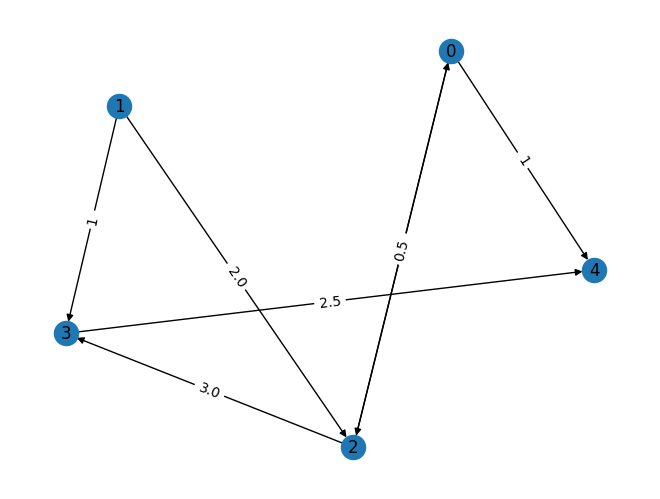

In [215]:
def main():
    g = Graph(5, directed=True)
    g.add_edge(0, 2, 0.5)
    g.add_edge(0, 4)
    g.add_edge(1, 2, 2.0)
    g.add_edge(1, 3)
    g.add_edge(2, 0, 0.5)
    g.add_edge(2, 3, 3.0)
    g.add_edge(3, 4, 2.5)

    g.print_out_edges(0)
    
    show_graph(g.adjMatrix, directed=True)


if __name__ == '__main__':
    main()

## Create a function to print all in edges of a node

In [216]:
def print_in_edges(self, v):
    if v > self.size - 1:
        print(f"Not found the vertex {v}")
        return
    print(f"List of in-edges of node {v}: ");
    for index, value in enumerate(self.adjMatrix):
        if value[v] != 0:
            print(f"{index} --{value[v]}--> {v}")
        
        
setattr(Graph, "print_in_edges", print_in_edges)

List of in-edges of node 0: 
2 --0.5--> 0
List of in-edges of node 2: 
0 --0.5--> 2
1 --2.0--> 2


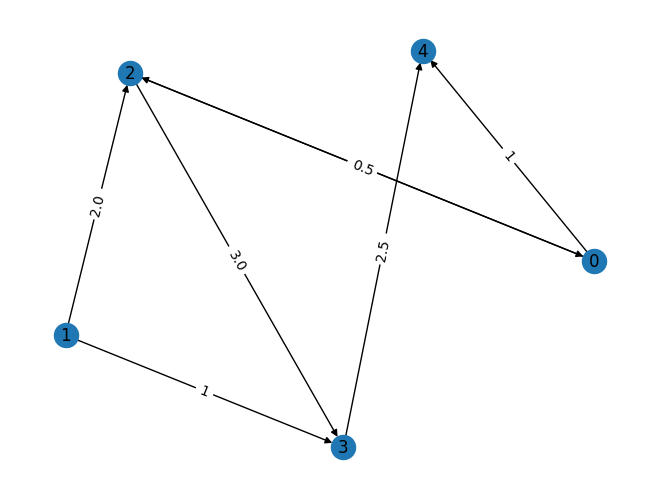

In [217]:
def main():
    g = Graph(5, directed=True)
    g.add_edge(0, 2, 0.5)
    g.add_edge(0, 4)
    g.add_edge(1, 2, 2.0)
    g.add_edge(1, 3)
    g.add_edge(2, 0, 0.5)
    g.add_edge(2, 3, 3.0)
    g.add_edge(3, 4, 2.5)
    
    g.print_in_edges(0)

    g.print_in_edges(2)
    
    show_graph(g.adjMatrix, directed=True)


if __name__ == '__main__':
    main()

## Get weight of an edge

In [218]:
def get_edge_weight(self, v1, v2):
    if v1 > self.size - 1 or v2 > self.size - 1:
        print(f"Not found {v1} or {v2}!")
        return 0
    return self.adjMatrix[v1][v2]
        
        
setattr(Graph, "get_edge_weight", get_edge_weight)

In [219]:
def main():
    g = Graph(5)
    g.add_edge(0, 2, 0.5)
    g.add_edge(0, 4)
    g.add_edge(1, 2, 2.0)
    g.add_edge(1, 3)
    g.add_edge(2, 0, 0.5)
    g.add_edge(2, 3, 3.0)
    g.add_edge(3, 4, 2.5)

    print(f"Weight of an edge 1 -> 2: {g.get_edge_weight(1, 2)}")

if __name__ == '__main__':
    main()

Weight of an edge 1 -> 2: 2.0


## Print Adjacency Lists in the graph
### For directed graph

In [220]:
def print_all_edges(self):
    print("The Adjacency lists: ")
    for i, row in enumerate(self.adjMatrix):
        print("Node (" + str(i) + "): ", end="")
        for j, value in enumerate(row):
            if value != 0:
                print(f" -- {value} --> ({j})", end="")
        print("\n")
        
        
setattr(Graph, "print_all_edges", print_all_edges)

In [221]:
def main():
    g = Graph(5, directed=True)
    g.add_edge(0, 2, 0.5)
    g.add_edge(0, 4)
    g.add_edge(1, 2, 2.0)
    g.add_edge(1, 3)

    g.print_all_edges()


if __name__ == '__main__':
    main()

The Adjacency lists: 
Node (0):  -- 0.5 --> (2) -- 1 --> (4)

Node (1):  -- 2.0 --> (2) -- 1 --> (3)

Node (2): 

Node (3): 

Node (4): 



### For undirected graph

In [222]:
def main():
    g = Graph(5, directed=False)
    g.add_edge(0, 2, 0.5)
    g.add_edge(0, 4)
    g.add_edge(1, 2, 2.0)
    g.add_edge(1, 3)

    g.print_all_edges()


if __name__ == '__main__':
    main()

The Adjacency lists: 
Node (0):  -- 0.5 --> (2) -- 1 --> (4)

Node (1):  -- 2.0 --> (2) -- 1 --> (3)

Node (2):  -- 0.5 --> (0) -- 2.0 --> (1)

Node (3):  -- 1 --> (1)

Node (4):  -- 1 --> (0)



## Create Simple Graphs with Adjacency List

In [199]:
class AdjNode:
    def __init__(self, vertex, weight=1):
        self.vertex = vertex
        self.weight = weight
        self.next = None

def show_list(vertex):
    if vertex != None:
        show_list(vertex.next)
        print(" -- {} --> ({})".format(vertex.weight,vertex.vertex), end="")
        

class GraphAdjList:
    def __init__(self, num_nodes):
        self.V = num_nodes
        self.graph = [None] * self.V

    # Add edges
    def add_edge(self, sourse_v, target_v, weight=1):
        node = AdjNode(target_v, weight)
        node.next = self.graph[sourse_v]
        self.graph[sourse_v] = node
        
        node = AdjNode(sourse_v, weight)
        node.next = self.graph[target_v]
        self.graph[target_v] = node
        

    # Print the graph
    def print_graph(self):
        for i in range(self.V):
            print("The Adjacency lists: ")
            print("Node (" + str(i) + "): ", end="")
            temp = self.graph[i]
            show_list(temp)
            print(" \n")


In [200]:
if __name__ == "__main__":
    num_nodes = 5

    # Create undirected graph and edges
    g = GraphAdjList(num_nodes)
    g.add_edge(0, 2, 0.5)
    g.add_edge(0, 4)
    g.add_edge(1, 2, 2.0)
    g.add_edge(1, 3)

    g.print_graph()

The Adjacency lists: 
Node (0):  -- 0.5 --> (2) -- 1 --> (4) 

The Adjacency lists: 
Node (1):  -- 2.0 --> (2) -- 1 --> (3) 

The Adjacency lists: 
Node (2):  -- 0.5 --> (0) -- 2.0 --> (1) 

The Adjacency lists: 
Node (3):  -- 1 --> (1) 

The Adjacency lists: 
Node (4):  -- 1 --> (0) 



# Networkx
## Generate the adjacency matrix from a graph
### Sparse matrix


In [201]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Instantiate the graph
G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), (8, 9)])

A = nx.adjacency_matrix(G)
print(A)


  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (1, 0)	1
  (1, 3)	1
  (1, 5)	1
  (2, 0)	1
  (3, 0)	1
  (3, 1)	1
  (3, 6)	1
  (4, 0)	1
  (4, 6)	1
  (4, 8)	1
  (5, 1)	1
  (6, 3)	1
  (6, 4)	1
  (6, 7)	1
  (7, 6)	1
  (8, 4)	1
  (8, 9)	1
  (9, 8)	1


### Adjacency list

In [207]:
adjacency_list = nx.generate_adjlist(G)
for line in adjacency_list:
    print(line)

0 1 2 3 5
1 3 6
2
3 4
5 8
6
4 5 7
7
8 9
9


### Dense matrix

In [203]:
A = nx.adjacency_matrix(G)
A_dense = A.todense()
print(A_dense)

# Pandas format
nx.to_pandas_adjacency(G)

[[0 1 1 1 1 0 0 0 0 0]
 [1 0 0 1 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 1 0 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]]


,0,1,2,3,5,6,4,7,8,9
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Calculate the number of IN-edges, OUT-edges, add edge and remove edge.

In [204]:
# Instantiate the graph
G = nx.DiGraph()
# add node/edge pairs
G.add_edges_from([("A", "B"), ("B", "A"), ("C", "B"), ("C", "D")])

# Get a vertex’s out-edges:
print(f"OUT-edges of node B: {G.out_degree('B')}")
# Get a vertex’s in-edges: 
print(f"IN-edges of node B: {G.in_degree('B')}")
# Decide if some edge exists: 
print(f"Check an edge from A to C: {G.has_edge('A', 'C')}")
# Insert an edge:
G.add_edge("A", "C") 
# OR 
G.add_edges_from([("A", "D")])
print(f"Check an edge from A to C: {G.has_edge('A', 'C')}")
print(f"Check an edge from A to D: {G.has_edge('A', 'D')}")
# Delete an edge:
G.remove_edge("A", "C") 
# OR 
G.remove_edges_from([("A", "D")])
print(f"Check an edge from A to C: {G.has_edge('A', 'C')}")
print(f"Check an edge from A to D: {G.has_edge('A', 'D')}")

OUT-edges of node B: 1
IN-edges of node B: 2
Check an edge from A to C: False
Check an edge from A to C: True
Check an edge from A to D: True
Check an edge from A to C: False
Check an edge from A to D: False


In [205]:
# Instantiate the graph
G = nx.DiGraph()
# add node/edge pairs
G.add_edges_from([("A", "B"), ("B", "A"), ("C", "B"), ("C", "D")])
adjacency_list = nx.generate_adjlist(G)
for line in adjacency_list:
    print(line)

A B
B A
C B D
D


## Sparse and dense adjacency matrix of a directed graph

In [229]:
# Instantiate the graph
G = nx.DiGraph()
# add node/edge pairs
G.add_edges_from([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), (8, 9)])


A = nx.adjacency_matrix(G)
print("The sparse adjacency matrix: ")
print(A)

print("The dense adjacency matrix: ")
A_dense = A.todense()
print(A_dense)

# Pandas format
nx.to_pandas_adjacency(G)

The sparse adjacency matrix: 
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (1, 3)	1
  (1, 5)	1
  (3, 6)	1
  (4, 8)	1
  (6, 4)	1
  (6, 7)	1
  (8, 9)	1
The dense adjacency matrix: 
[[0 1 1 1 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]]


,0,1,2,3,5,6,4,7,8,9
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Shortest path between 2 nodes

Shortest path from 0 -> 9: 
0->3->4->5->8->9


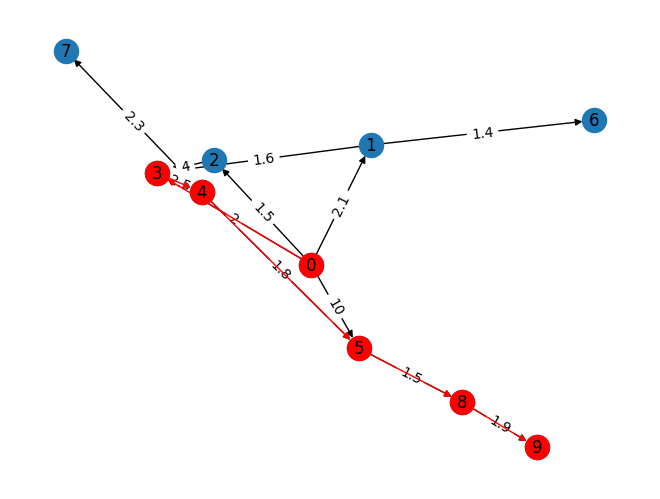

In [267]:
# Instantiate the graph
G = nx.DiGraph()

edges = [(0, 1, 2.1), (0, 2, 1.5), (0, 3, 2), (0, 5, 10), (1, 3, 1.6), (1, 6, 1.4), (2, 3, 4), (3, 4, 2.5), (4, 5, 1.8), (4, 7, 2.3), (5, 8, 1.5), (8, 9, 1.9)]
# add node/edge pairs
G.add_weighted_edges_from(edges)

# Pandas format
nx.to_pandas_adjacency(G)

pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True)
# draw path in red

source = 0
target = 9
path = nx.shortest_path(G,source=source,target=target, weight='weight', method="dijkstra")

print(f"Shortest path from {source} -> {target}: ")
print("->".join(map(str, path)))

path_edges = list(zip(path,path[1:]))
nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r')

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r')